In [2]:
import numpy as np

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# length of data frame
df.shape

(32581, 12)

In [69]:
# checking column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# checking null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [71]:
# all unique values
features = df.columns
for feature in features:
    print(f"{feature} ---> {df[feature].nunique()}")

person_age ---> 58
person_income ---> 4295
person_home_ownership ---> 4
person_emp_length ---> 36
loan_intent ---> 6
loan_grade ---> 7
loan_amnt ---> 753
loan_int_rate ---> 348
loan_status ---> 2
loan_percent_income ---> 77
cb_person_default_on_file ---> 2
cb_person_cred_hist_length ---> 29


In [72]:
print(df["person_emp_length"].mean())
print(df["person_emp_length"].median())

4.789686296787225
4.0


In [6]:
# filling null values with median
df["person_emp_length"]=df["person_emp_length"].fillna(df["person_emp_length"].median())

In [74]:
print(df["loan_int_rate"].mean())
print(df["loan_int_rate"].median())

11.01169489224439
10.99


In [7]:
# filling null values with median
df["loan_int_rate"]=df["loan_int_rate"].fillna(df["loan_int_rate"].median())

In [26]:
df.to_csv("bank_data.csv")

In [76]:
# after filling missing values
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [77]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
def outliers(df,col):

    q1=np.quantile(df[col],0.25)
    q2=np.quantile(df[col],0.50)
    q3=np.quantile(df[col],0.75)
    # calculation iqr
    IQR =q3-q1
    lower_boundary=q1-(1.5*IQR)
    upper_boundary=q3+(1.5*IQR)
    df=df[(df[col]>lower_boundary)&(df[col]<upper_boundary)]
    return df


# univariate analysis

## analysis of person age

In [79]:
print(df["person_age"].min())
print(df["person_age"].max())
print(df["person_age"].mean())
print(df["person_age"].median())
print(df["person_age"].std())

20
144
27.73459992019889
26.0
6.3480784192252475


In [31]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'boxplot of person age')

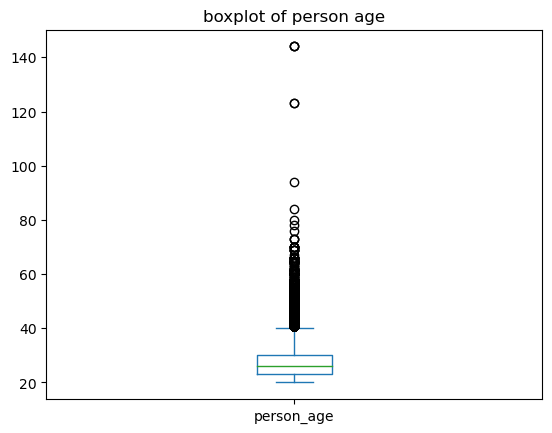

In [32]:
# boxplot for outliers
df["person_age"].plot(kind="box")
plt.title("boxplot of person age")

# Insights
- There are lot of outliers are in data
- The average age is 26

In [65]:
# df=outliers(df,"person_age")
# df.shape

(31087, 12)

<AxesSubplot:>

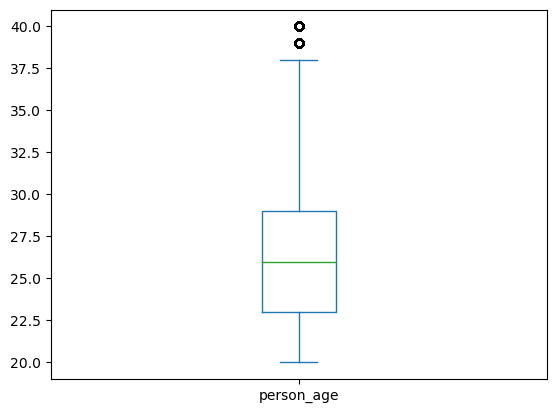

In [66]:
df["person_age"].plot(kind="box")

Text(0.5, 1.0, 'distribution of person age')

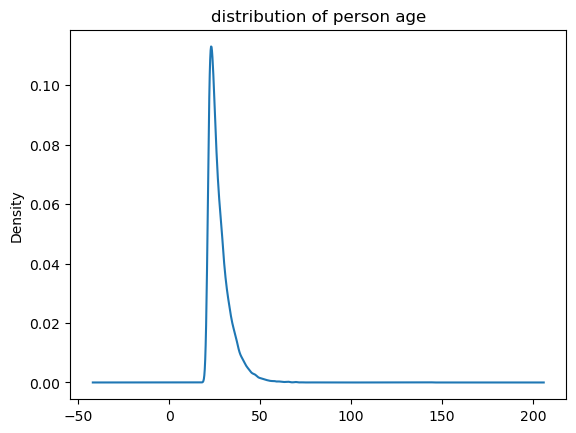

In [12]:
df["person_age"].plot(kind="kde")
plt.title("distribution of person age")

# Insights
- The kde is skewed so outliers are presented in data with 2.5813

In [45]:
df["person_age"].skew()

2.5813925261849846

In [4]:
from scipy import stats

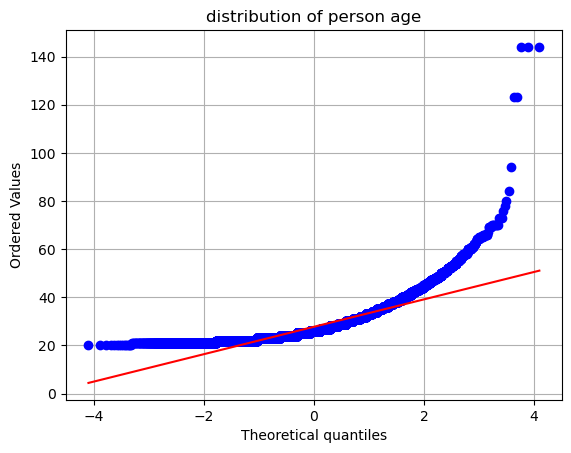

In [16]:
stats.probplot(df["person_age"],dist="norm",plot=plt)
plt.title("distribution of person age")
plt.grid()

# Insights 
- This is not a normal distribution the outliers are in data

In [9]:
df=df[(df["person_age"]<=70)]

In [10]:
df.shape

(32568, 12)

Text(0.5, 1.0, 'boxplot of age removing extream outliers')

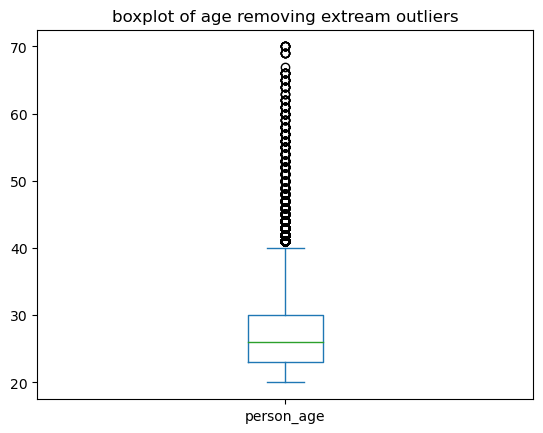

In [82]:
df["person_age"].plot(kind="box")
plt.title("boxplot of age removing extream outliers")

# Insights 
- The Extream outliers are removed
- The average age is 26

In [84]:
df.shape

(32568, 12)

In [83]:
df["person_age"].skew()

1.8519225889414004

In [85]:
from scipy import stats

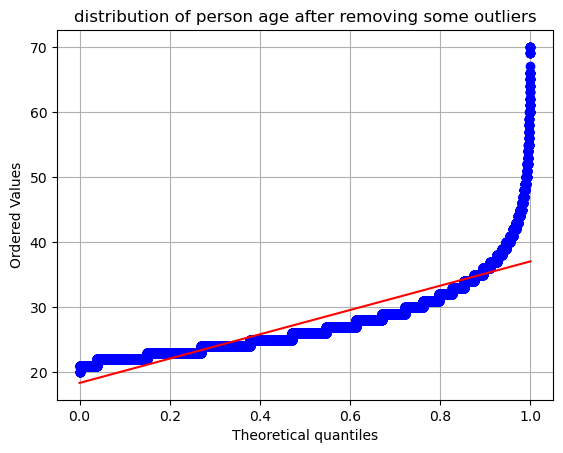

In [86]:
stats.probplot(df["person_age"],dist="uniform",plot=plt)
plt.title("distribution of person age after removing some outliers")
plt.grid()

# Insights
- The most of the dots are not on line is not a uniform distribution

In [26]:
# apply log transformation
x_t,l=stats.boxcox(df["person_age"])
print(l)

-2.413496453615275


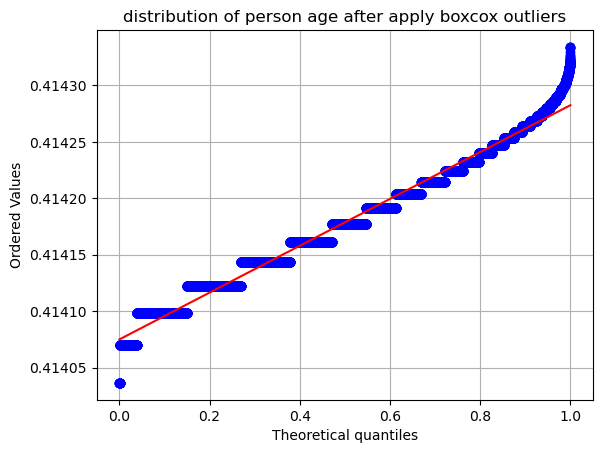

In [32]:
# with log transform values
stats.probplot(x_t,dist="uniform",plot=plt)
plt.title("distribution of person age after apply boxcox outliers")
plt.grid()

# Insights
- The distribution after the boxcox or lo transformed values are mostly on line
- The skewness with outliers 2.5813 and with outlies 1.8519 

## analysis of person income

In [35]:
print(df["person_income"].min())
print(df["person_income"].max())
print(df["person_income"].mean())
print(df["person_income"].median())
print(df["person_income"].std())
print("The mean and median both are so different ,so there may be outliers")

4000
6000000
66074.84846996715
55000.0
61983.119168159064
The mean and median both are so different ,so there may be outliers


Text(0.5, 1.0, 'boxplot of person income')

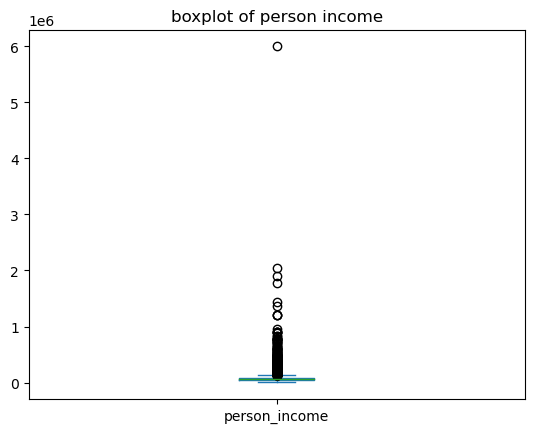

In [36]:
df["person_income"].plot(kind="box")
plt.title("boxplot of person income")

# Insights
- There are so many outliers in the person home ownership


Text(0.5, 1.0, 'kde plot of person income')

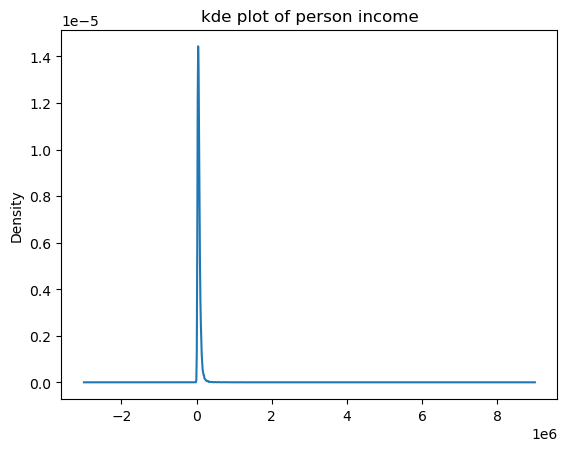

In [37]:
df["person_income"].plot(kind="kde")
plt.title("kde plot of person income")

# Insights
- These not like a normal distribution and skewness is 32.8653

In [49]:
df["person_income"].skew()

32.865348833904434

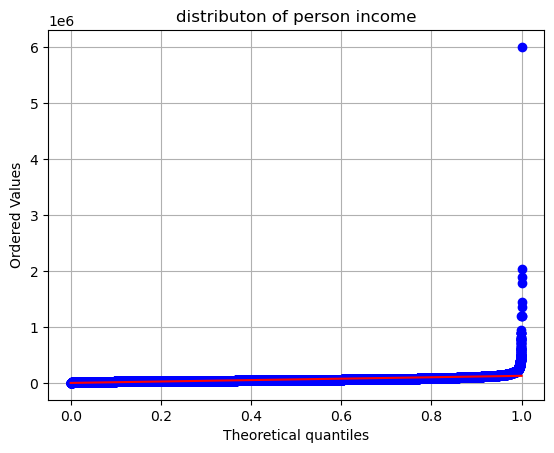

In [39]:
stats.probplot(df["person_income"],dist="uniform",plot=plt)

plt.title("distributon of person income")
plt.grid()

# Insighjts
- The all dots are on line but the line is not 45%

In [94]:
# removing of outliers by skipping
#df=df[(df["person_income"]<=150000)]

In [95]:
df.shape

(31434, 12)

In [11]:
df=outliers(df,"person_income")

In [12]:
df.shape

(31087, 12)

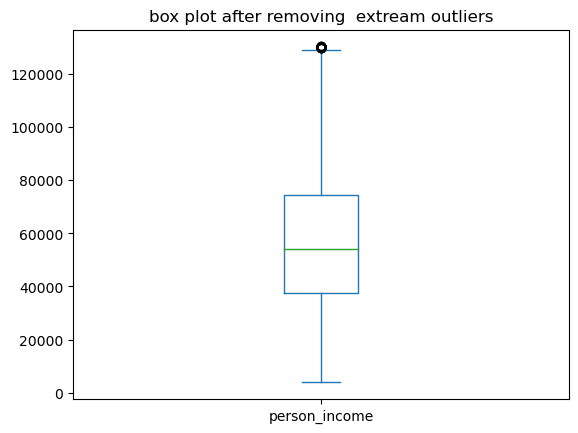

In [99]:
df["person_income"].plot(kind="box")
plt.title("box plot after removing  extream outliers")
plt.show()

# Insights 
- After removing extream outliers there no outliers

Text(0.5, 1.0, 'kde of  after removing  extream outliers')

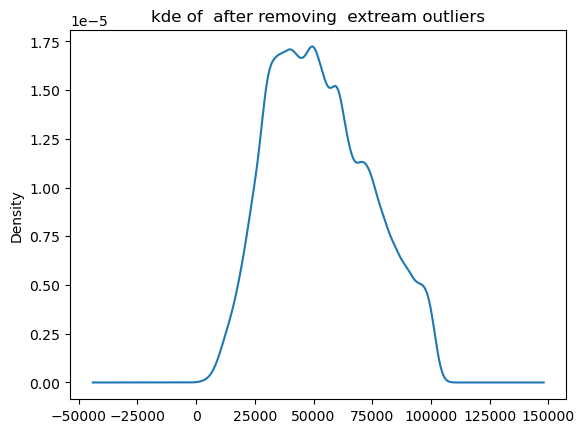

In [51]:
income_df["person_income"].plot(kind="kde")
plt.title("kde of  after removing  extream outliers")

# Insights
- There is lot skewness 32.8 before  treating outliers
- after outliers treatment the skewness is 0.293

In [102]:
df["person_income"].skew()

0.6462249183841947

In [101]:
df["person_income"].skew()

0.6462249183841947

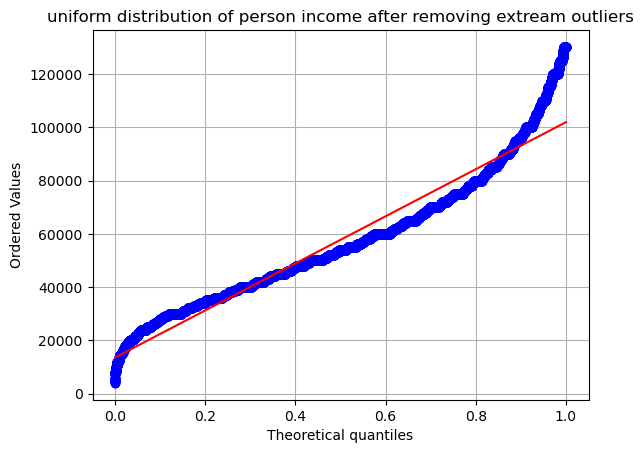

In [100]:
stats.probplot(df["person_income"],dist="uniform",plot=plt)
plt.title("uniform distribution of person income after removing extream outliers")
plt.grid()

# Insights
- The removing of outliers the is distribution is uniform
- The skewnees with outliers 32.8654 and after outliers treatment skewnees is0.2936

# analysis of person home ownership

In [14]:
# non visual  univariate analysis
df["person_home_ownership"].mode()

0    RENT
Name: person_home_ownership, dtype: object

In [15]:
df["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [16]:
# probability of person home owner ship
df["person_home_ownership"].value_counts(normalize=True)

RENT        0.504773
MORTGAGE    0.412633
OWN         0.079310
OTHER       0.003284
Name: person_home_ownership, dtype: float64

Text(0.5, 1.0, 'barplot of person home ownership ')

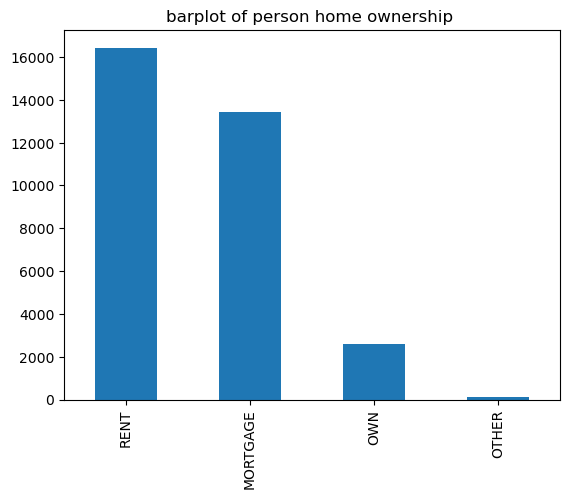

In [19]:
df["person_home_ownership"].value_counts().plot(kind="bar")
plt.title("barplot of person home ownership ")

# Insights
- The rented and mortgage people are most presented in data and owned home people are less

# analysis of person emp length

In [13]:
print(df["person_emp_length"].min())
print(df["person_emp_length"].max())
print(df["person_emp_length"].mean())
print(df["person_emp_length"].median())
print(df["person_emp_length"].std())
print(" The mean and median are so closly so their may be no outliers in data")

0.0
123.0
4.767993615911114
4.0
4.087371678206524
 The mean and median are so closly so their may be no outliers in data


Text(0.5, 1.0, 'boxplot of person emp length')

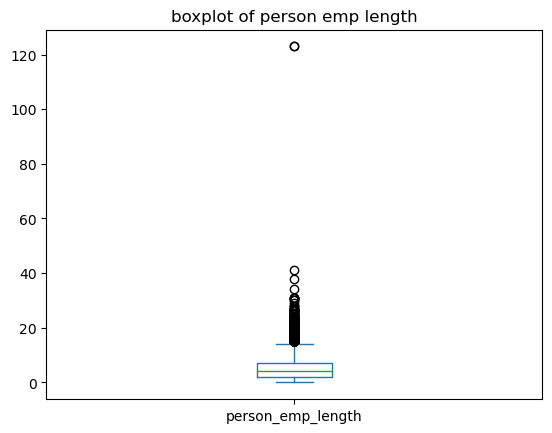

In [25]:
# boxplot for outliers 
df["person_emp_length"].plot(kind="box")
plt.title("boxplot of person emp length")

# Insights
- some outliers are presented in the data and average is 4.0


Text(0.5, 1.0, 'kde plot of person emp length')

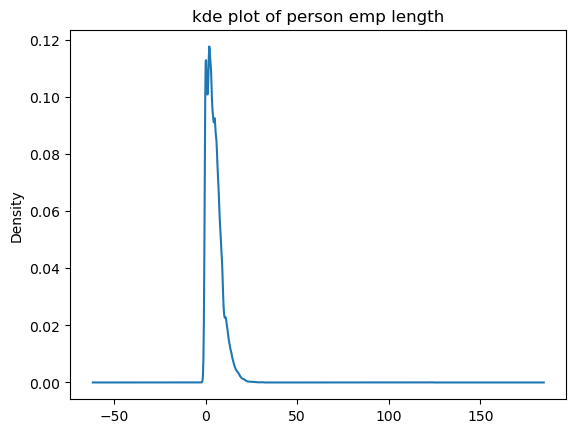

In [27]:
# boxplot for outliers 
df["person_emp_length"].plot(kind="kde")
plt.title("kde plot of person emp length")

# Insights
- The kde is right skewed with 2.662 and and  std is 4.0873

In [17]:
df["person_emp_length"].skew()

2.6628784524960363

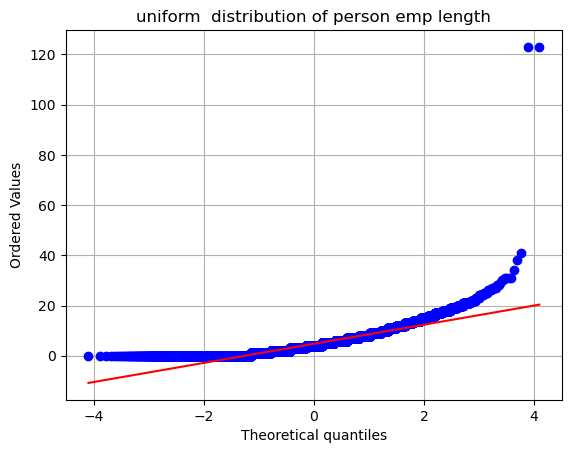

In [18]:
stats.probplot(df["person_emp_length"],dist="norm",plot=plt)
plt.title("uniform  distribution of person emp length")
plt.grid()

# Insights
- The distribution is  not normal distribution and outliers are at top right

In [105]:
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.066189,0.042235,0.028435,0.015320,-0.012236,-0.019557,0.874775
person_income,0.066189,1.000000,0.192808,0.382942,-0.038922,-0.259051,-0.323883,0.045342
person_emp_length,0.042235,0.192808,1.000000,0.102528,-0.059863,-0.089989,-0.043199,0.035971
loan_amnt,0.028435,0.382942,0.102528,1.000000,0.128679,0.125986,0.651810,0.021575
loan_int_rate,0.015320,-0.038922,-0.059863,0.128679,1.000000,0.320081,0.120272,0.020479
loan_status,-0.012236,-0.259051,-0.089989,0.125986,0.320081,1.000000,0.380979,-0.007483
loan_percent_income,-0.019557,-0.323883,-0.043199,0.651810,0.120272,0.380979,1.000000,-0.010080
cb_person_cred_hist_length,0.874775,0.045342,0.035971,0.021575,0.020479,-0.007483,-0.010080,1.000000


In [13]:
df=outliers(df,"person_emp_length")
df.shape

(30330, 12)

<AxesSubplot:>

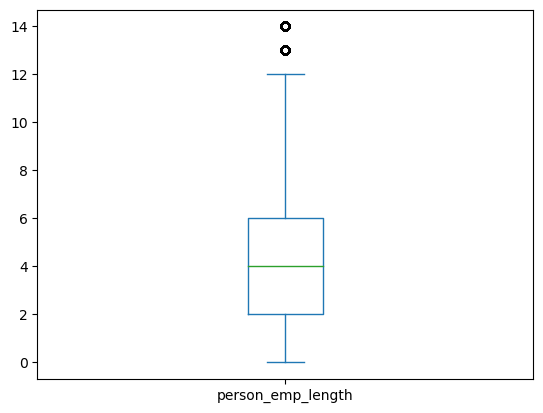

In [104]:
df["person_emp_length"].plot(kind="box")

In [19]:
# income_df=df[(df["person_emp_length"]<=32)]

Text(0.5, 1.0, 'boxplot of person emp length ')

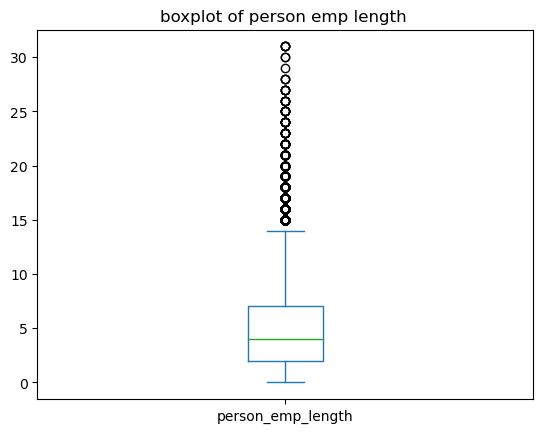

In [20]:
# income_df["person_emp_length"].plot(kind="box")
# plt.title("boxplot of person emp length ")

Text(0.5, 1.0, 'kde plot of person emp length  ')

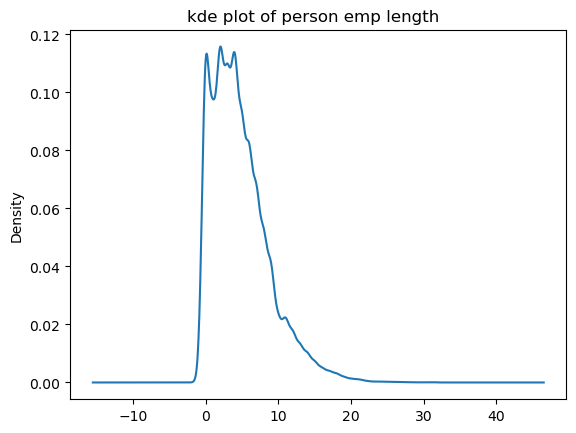

In [21]:
income_df["person_emp_length"].plot(kind="kde")
plt.title("kde plot of person emp length  ")

# Insights 
- removing some extream ouliers by reducing skewness  2.662  to 1.2401

In [107]:
print(df["person_emp_length"].min())
print(df["person_emp_length"].max())
print(df["person_emp_length"].mean())
print(df["person_emp_length"].median())
print(df["person_emp_length"].std())
print(" atfer revoming the extream outliers the standard deviation is decreased from 4.0873 to 3.8985")

0.0
14.0
4.355239016579378
4.0
3.3427944512851413
 atfer revoming the extream outliers the standard deviation is decreased from 4.0873 to 3.8985


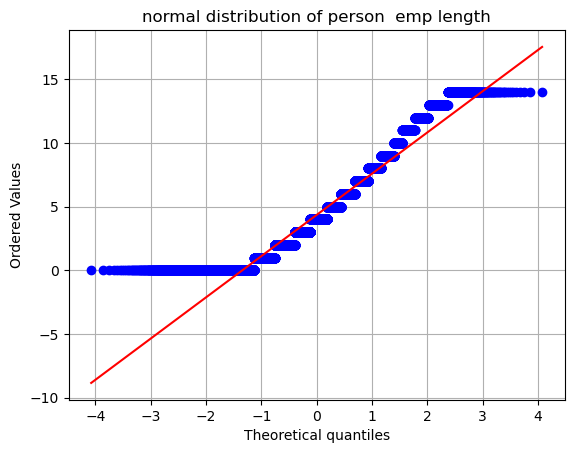

In [108]:
stats.probplot(df["person_emp_length"],dist="norm",plot=plt)
plt.title("normal distribution of person  emp length")
plt.grid()

# Insights
- atfer revoming the extream outliers the standard deviation is decreased from 4.0873 to 3.8985 
- the skewness is decreased from 2.6628 to 1.2401 by removing outliers

In [109]:
df["person_emp_length"].skew()

0.7018657608688437

In [110]:
# the distribution is not positive so we can't apply  log transformation
a_t1,l=stats.boxcox(df["person_emp_length"])
print(l)

ValueError: Data must be positive.

# analysis of loan intent

In [54]:
df["loan_intent"].mode()

0    EDUCATION
Name: loan_intent, dtype: object

In [55]:
df["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [56]:
df["loan_intent"].value_counts(normalize=True)

EDUCATION            0.198060
MEDICAL              0.186336
VENTURE              0.175532
PERSONAL             0.169455
DEBTCONSOLIDATION    0.159971
HOMEIMPROVEMENT      0.110647
Name: loan_intent, dtype: float64

Text(0.5, 1.0, 'barplot of loan intent')

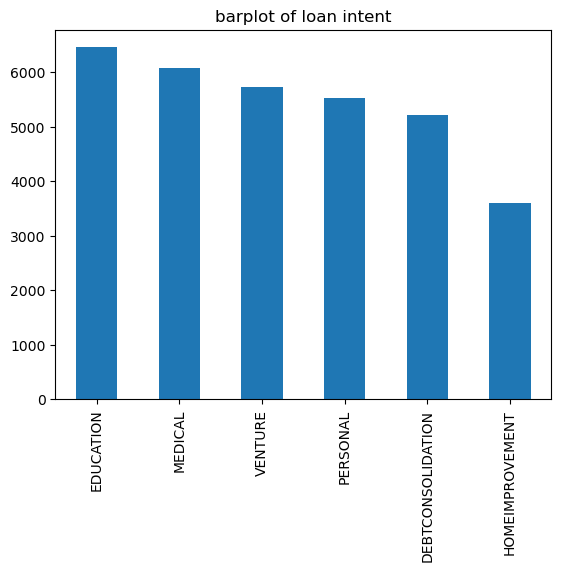

In [57]:
df["loan_intent"].value_counts().plot(kind="bar")
plt.title("barplot of loan intent")

# Insights
- The majority of loans are eduction based loans oand others loans are in range of above 5000
- except home improvement are below 4000

# analysis of loan grade

In [58]:
df["loan_grade"].mode()

0    A
Name: loan_grade, dtype: object

In [59]:
df["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [60]:
df["loan_grade"].value_counts(normalize=True)

A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: loan_grade, dtype: float64

Text(0.5, 1.0, 'barplot of loan grade')

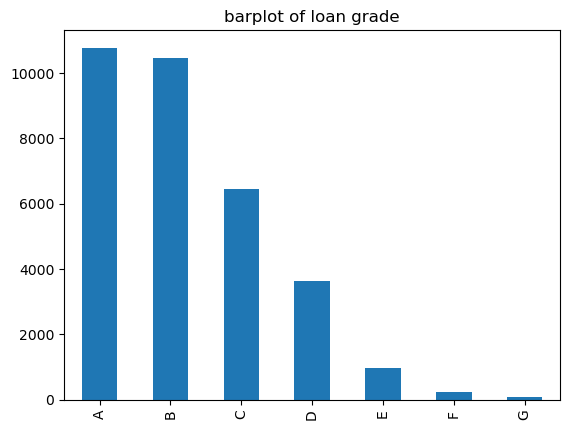

In [61]:
df["loan_grade"].value_counts().plot(kind="bar")
plt.title("barplot of loan grade")

# Insights
- The loan A ,b above 10,000 and both are in top to compare with others
- The loan E,F are very low and G is least one with 64 

# analysis of loan amnt

In [64]:
print(df["loan_amnt"].min())
print(df["loan_amnt"].max())
print(df["loan_amnt"].mean())
print(df["loan_amnt"].median())
print(df["loan_amnt"].std())
print("The mean and median are so far there may be outliers in the data")

500
35000
9589.371105859243
8000.0
6322.086645792174
The mean and median are so far there may be outliers in the data


Text(0.5, 1.0, 'boxplot of loan amount')

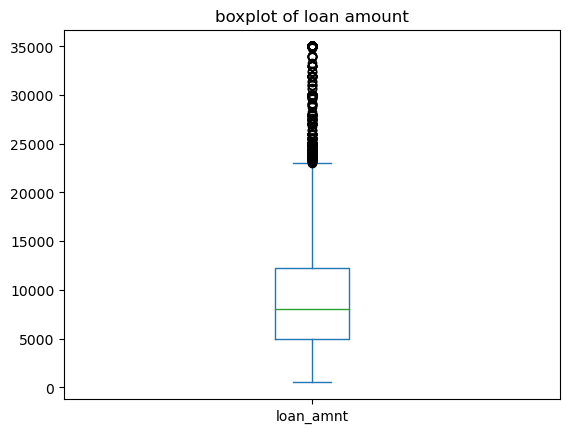

In [66]:
# boxplot for outliers
df["loan_amnt"].plot(kind="box")
plt.title("boxplot of loan amount")

# Insights
- the outliers are presented in the data
- The average loan amount is 8000 and std is 6322.0

In [111]:
income_df =outliers(df,"loan_amnt")
income_df.shape

(28734, 12)

<AxesSubplot:>

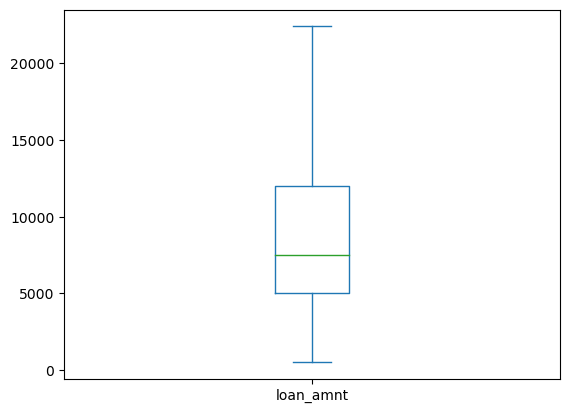

In [112]:
income_df["loan_amnt"].plot(kind="box")

Text(0.5, 1.0, 'kdeplot of loan amount')

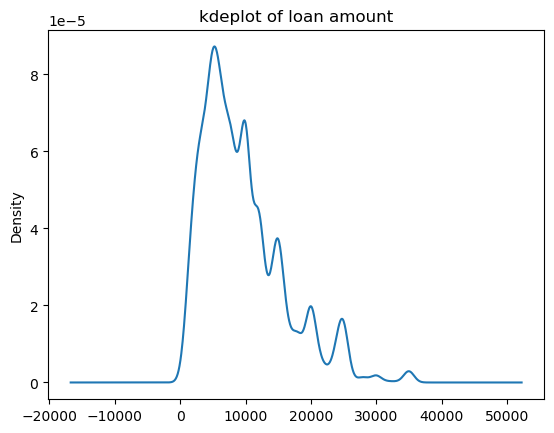

In [67]:
# kde for distribution loan amount
df["loan_amnt"].plot(kind="kde")
plt.title("kdeplot of loan amount")

# Insights
- The distribution is right skewed 1.1924

In [55]:
df["loan_amnt"].skew()

1.1924774277661998

Text(0.5, 1.0, 'loan amount uniform distribution   ')

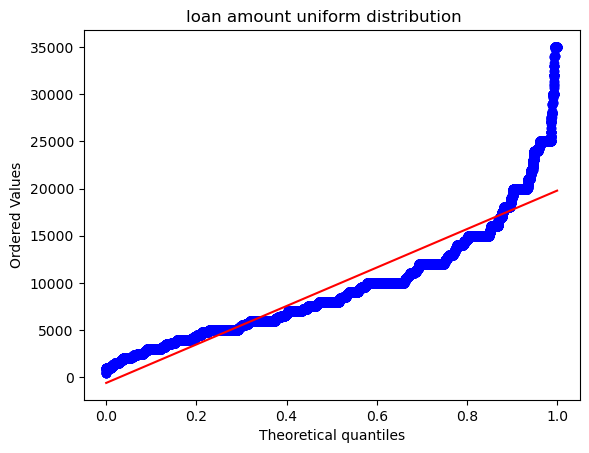

In [73]:
# distribution of loan amount
stats.probplot(df["loan_amnt"],dist="uniform",plot=plt)
plt.title("loan amount uniform distribution   ")

In [56]:
# a_t2,l=stats.boxcox(df["loan_amnt"])
# print(l)

0.2363588392285395


In [57]:
a_t2.std()

5.781596855970077

Text(0.5, 1.0, 'loan amount uniform distribution   ')

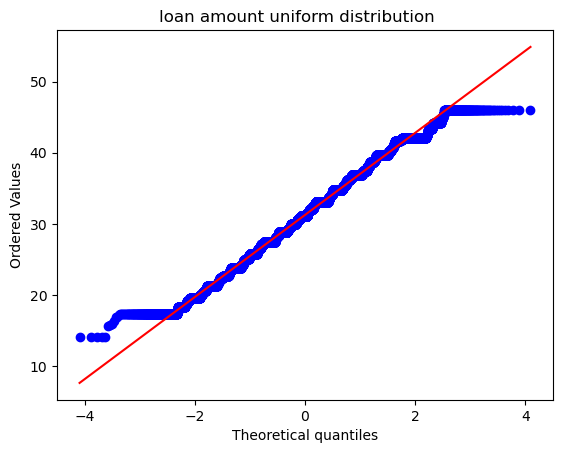

In [76]:
# distribution of loan amount
stats.probplot(a_t2,dist="norm",plot=plt)
plt.title("loan amount normal distribution   ")

# Insights
- after log transformation most of the points are on the line but some are far to line
- this better than before log transform

# analysis of loan int rate

In [27]:
print(df["loan_int_rate"].min())
print(df["loan_int_rate"].max())
print(df["loan_int_rate"].mean())
print(df["loan_int_rate"].median())
print(df["loan_int_rate"].std())
print(df["loan_int_rate"].var())

print("The mean and median are so close there may be no outliers in the data")

5.42
23.22
11.009620023939183
10.99
3.0816111515930578
9.496327289622691
The mean and median are so close there may be no outliers in the data


Text(0.5, 1.0, 'boxplot of loan int rate')

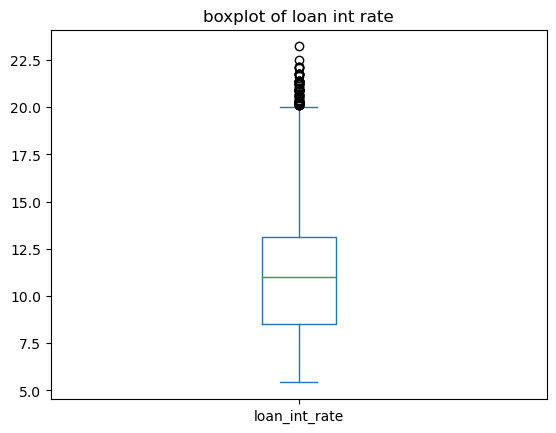

In [28]:
df["loan_int_rate"].plot(kind="box")
plt.title("boxplot of loan int rate")

# Insights 
- There 3 outliers in the data
- The average interest rate is 10.99

Text(0.5, 1.0, 'kde plot of loan int rate')

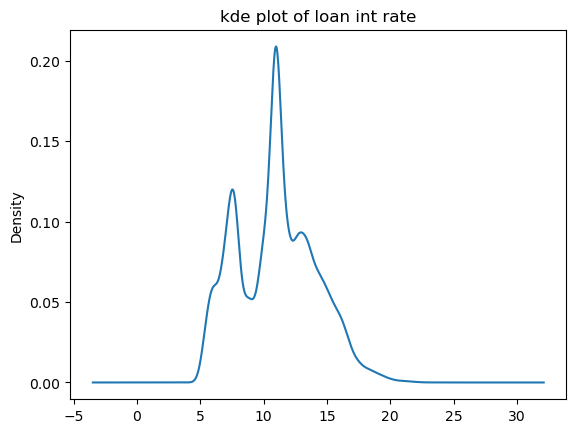

In [31]:
df["loan_int_rate"].plot(kind="kde")
plt.title("kde plot of loan int rate")

# Insights 
- The distribution is skewed 0.2213 and indicates the outliers
- The standard deviation is 3.081

In [40]:
df["loan_int_rate"].skew()

0.22131812425043357

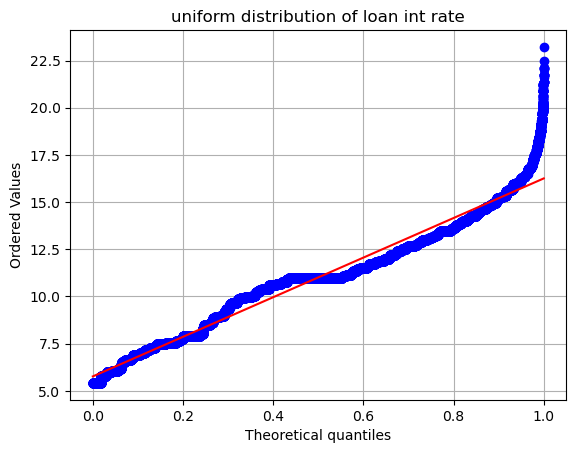

In [32]:
# distribution of loan int rate with null values
stats.probplot(df["loan_int_rate"],dist="uniform",plot=plt)
plt.title("uniform distribution of loan int rate")
plt.grid()

In [14]:
# outliers removing skipping
df=df[(df["loan_int_rate"]<=20)]
df.shape

(30263, 12)

<AxesSubplot:>

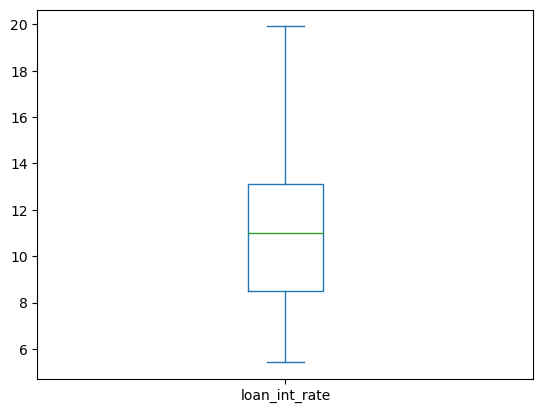

In [15]:
df["loan_int_rate"].plot(kind="box")

In [120]:
print(df["loan_int_rate"].min())
print(df["loan_int_rate"].max())
print(df["loan_int_rate"].mean())
print(df["loan_int_rate"].median())
print(df["loan_int_rate"].std())
print(df["loan_int_rate"].var())


5.42
19.91
10.98194951521127
10.99
3.0393913068229823
9.237899515991117


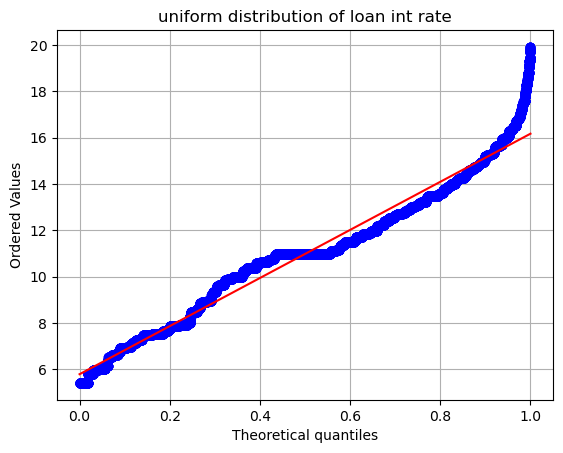

In [121]:
stats.probplot(df["loan_int_rate"],dist="uniform",plot=plt)
plt.title("uniform distribution of loan int rate")
plt.grid()

# Insights
- This is uniform distribution
- Before the outliers treatment the std is 3.081 
- Ater the outliers removing the std is 3.068

In [122]:
a_t3,l=stats.boxcox(df["loan_int_rate"])
print(l)

0.6343246770811384


In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'the distribution of interrest rate ')

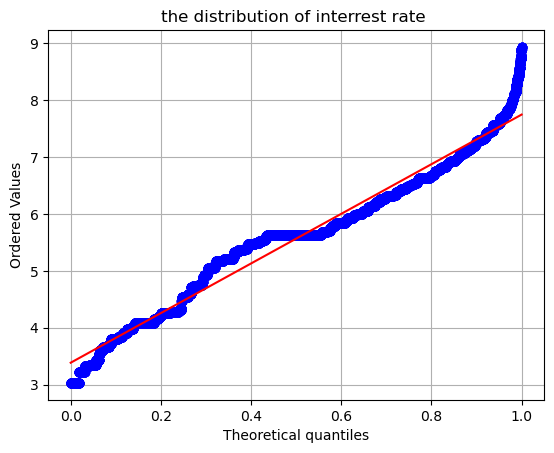

In [123]:
stats.probplot(a_t3,dist="uniform",plot=plt)
plt.grid()
plt.title("the distribution of interrest rate ")

# analysis of loan status


In [107]:
print(df["loan_status"].min())
print(df["loan_status"].max())
print(df["loan_status"].mean())
print(df["loan_status"].median())
print(df["loan_status"].std())



0
1
0.21816396059052823
0.0
0.4130056685601785


Text(0.5, 1.0, 'boxplot of loan status')

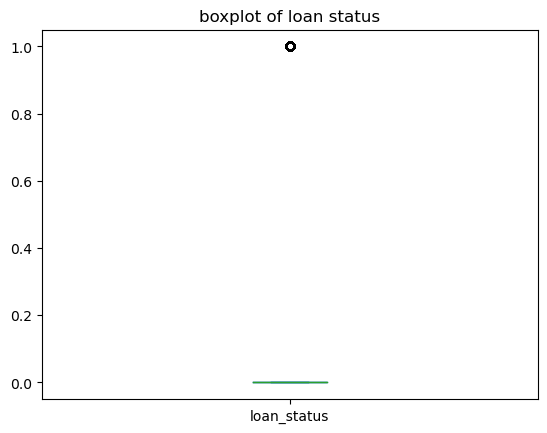

In [111]:
df["loan_status"].plot(kind="box")
plt.title("boxplot of loan status")

# Insights 
- One outlier is in the data and average is 0.0

Text(0.5, 1.0, 'kde plot of loan status')

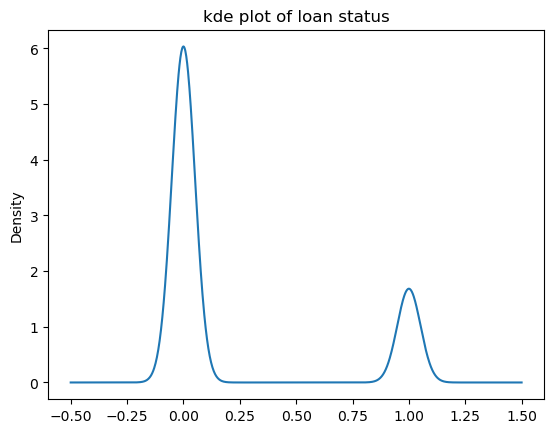

In [113]:
# distribution of loan status
df["loan_status"].plot(kind="kde")
plt.title("kde plot of loan status")

In [59]:
df["loan_status"].skew()

1.3648884873271683

Text(0.5, 1.0, 'distribution of loan status')

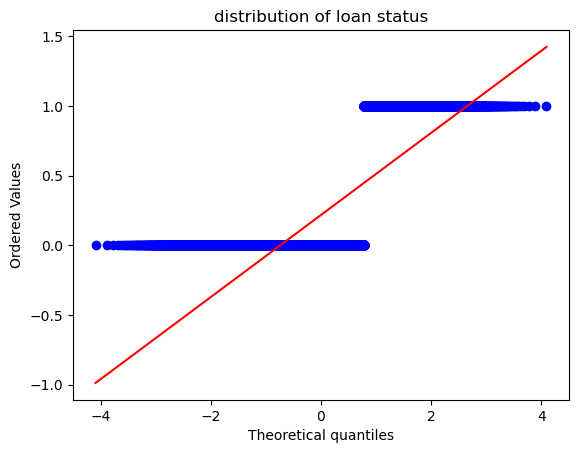

In [117]:
stats.probplot(df["loan_status"],dist="norm",plot=plt)
plt.title("distribution of loan status")

# Insights 
- The most of data is at 0 and skewness 1.3648

# analysis of loan percent income

In [124]:
print(df["loan_percent_income"].min())
print(df["loan_percent_income"].max())
print(df["loan_percent_income"].mean())
print(df["loan_percent_income"].median())
print(df["loan_percent_income"].std())

print("The mean and median are so close so may be no outliers ")

0.01
0.83
0.1753296556335712
0.15
0.1071607345831113
The mean and median are so close so may be no outliers 


Text(0.5, 1.0, 'boxplot of loan percent income')

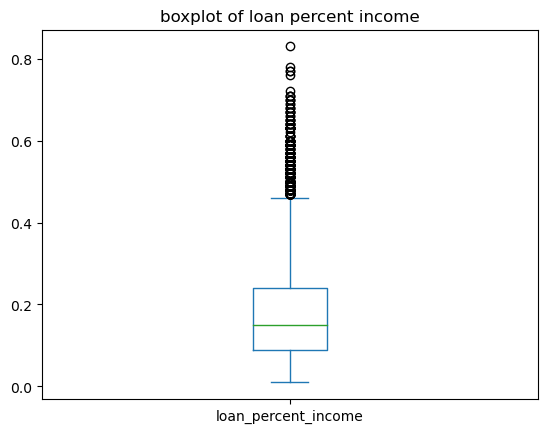

In [125]:
df["loan_percent_income"].plot(kind="box")
plt.title("boxplot of loan percent income")

# Insights
- There are many outliers are in data
- The average of loan percent income is 0.15

In [16]:
df =outliers(df,"loan_percent_income")
df.shape

(29636, 12)

<AxesSubplot:>

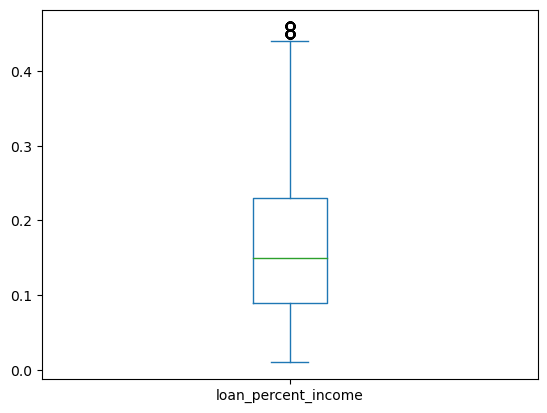

In [129]:
df["loan_percent_income"].plot(kind="box")

Text(0.5, 1.0, 'kde plot of loan percen income')

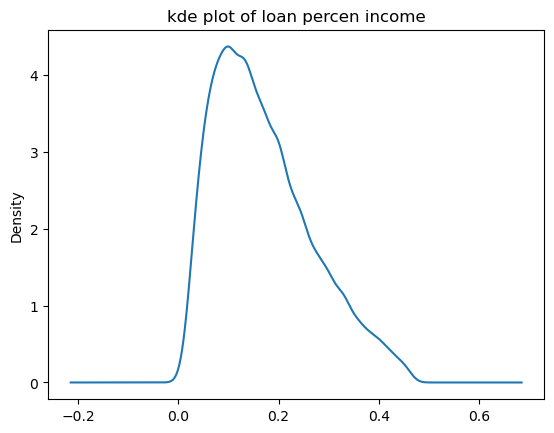

In [130]:
df["loan_percent_income"].plot(kind="kde")
plt.title("kde plot of loan percen income")

# Insights 
- The distribution is similar to normal but it's right skewed with 1.0646

In [131]:
df["loan_percent_income"].skew()

0.7149694630865947

Text(0.5, 1.0, 'uniform distribution of loan percent income')

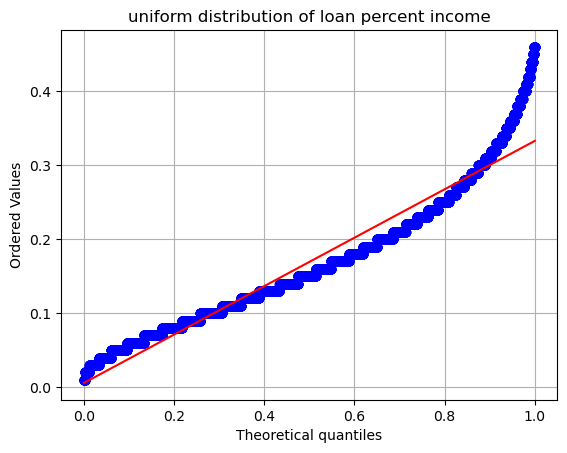

In [132]:
stats.probplot(df["loan_percent_income"],dist="uniform",plot=plt)
plt.grid()
plt.title("uniform distribution of loan percent income")

# Insights
- The distribution is uniform but all points are on line because of outliers

In [128]:
# apply boxcox 
a_t4,l=stats.boxcox(df["loan_percent_income"])
print(l)

ValueError: Data must be positive.

# analysis of cb_person_default_on_file

In [131]:
df["cb_person_default_on_file"].mode()

0    N
Name: cb_person_default_on_file, dtype: object

In [132]:
df["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [133]:
df["cb_person_default_on_file"].value_counts(normalize=True)

N    0.82367
Y    0.17633
Name: cb_person_default_on_file, dtype: float64

Text(0.5, 1.0, 'barplot of cb person default on file')

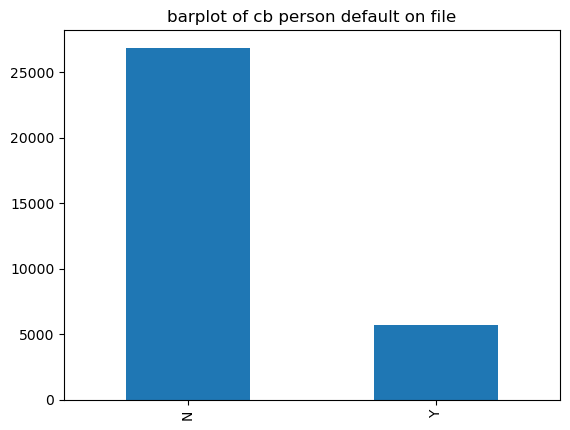

In [134]:
df["cb_person_default_on_file"].value_counts().plot(kind="bar")
plt.title("barplot of cb person default on file")

# Insights
- There mostly cb_person n count is so high above 25,000 and y count is low above 5000

# analysis of cb_person_cred_hist_length

In [136]:
print(df["cb_person_cred_hist_length"].min())
print(df["cb_person_cred_hist_length"].max())
print(df["cb_person_cred_hist_length"].mean())
print(df["cb_person_cred_hist_length"].median())
print(df["cb_person_cred_hist_length"].std())
print("The mean and median are so near sco, may be no outliers in data")

2
30
5.804211043246064
4.0
4.0550011647128406
The mean and median are so near sco, may be no outliers in data


Text(0.5, 1.0, 'boxplot of cb person cred hist length')

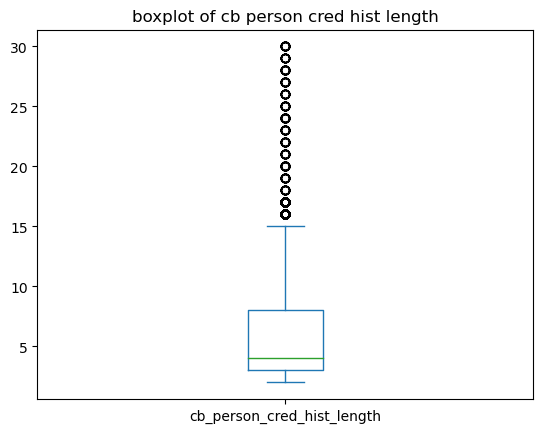

In [137]:
df["cb_person_cred_hist_length"].plot(kind="box")
plt.title("boxplot of cb person cred hist length")

# Insights
- There are some outliers in the data
- The average cp person cred hist length is 4.0

In [133]:
# income_df = outliers(df,"cb_person_cred_hist_length")
# income_df.shape

(28507, 12)

In [17]:
df=df[(df["cb_person_cred_hist_length"]<=18)]
df.shape

(29431, 12)

<AxesSubplot:>

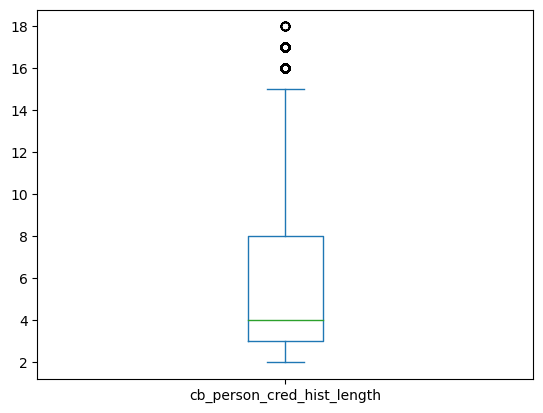

In [147]:
df["cb_person_cred_hist_length"].plot(kind="box")

Text(0.5, 1.0, 'kde plot of cb person cred hist length')

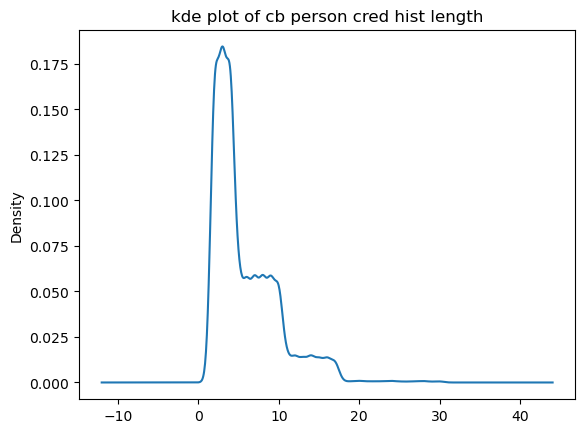

In [27]:
df["cb_person_cred_hist_length"].plot(kind="kde")
plt.title("kde plot of cb person cred hist length")

In [142]:
df["cb_person_cred_hist_length"].skew()

1.2855513745917277

Text(0.5, 1.0, 'norm distribution cb_person_cred_hist_length')

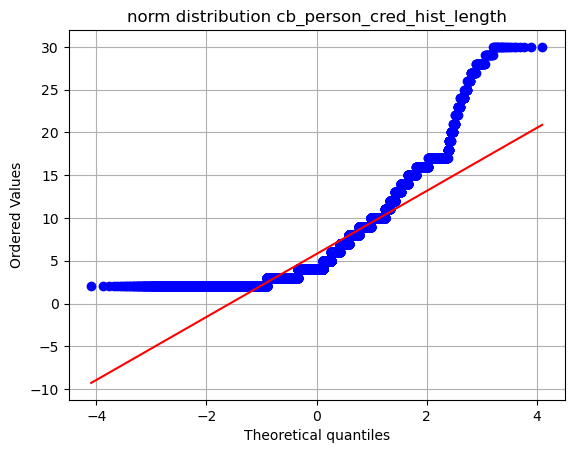

In [37]:
stats.probplot(df["cb_person_cred_hist_length"],dist="norm",plot=plt)
plt.grid()
plt.title("norm distribution cb_person_cred_hist_length")

In [31]:
# log transform
a_t4,l=stats.boxcox(df["cb_person_cred_hist_length"])
print(l)

-0.2813969508571855


Text(0.5, 1.0, 'uniform distribution of cb_person_cred_hist_length ')

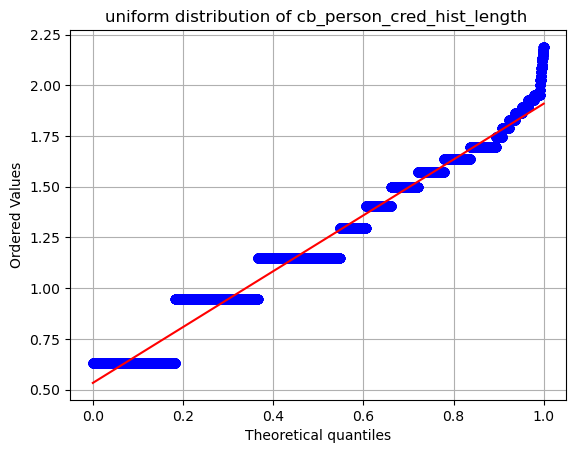

In [35]:
stats.probplot(a_t4,dist="uniform",plot=plt)
plt.grid()
plt.title("uniform distribution of cb_person_cred_hist_length ")

# bivariate   non-visual analysis

In [138]:
# non-visual analysis
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


# Insights
- The cp person cred hist length and person age is high positive corelated 0.859133
- loan percent income and loan amount is positively corelated with 0.572612

In [68]:
df.skew()

C:\Users\HAREESH\AppData\Local\Temp\ipykernel_9380\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


person_age                     2.581393
person_income                 32.865349
person_emp_length              2.662878
loan_amnt                      1.192477
loan_int_rate                  0.221318
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [67]:
df.kurt()

C:\Users\HAREESH\AppData\Local\Temp\ipykernel_9380\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


person_age                      18.560825
person_income                 2693.272776
person_emp_length               45.002497
loan_amnt                        1.423565
loan_int_rate                   -0.424785
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

In [ ]:
# Insights


In [66]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [142]:
df.shape

(32581, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### num vs num

Text(0.5, 1.0, 'scatter plot person age  loan status')

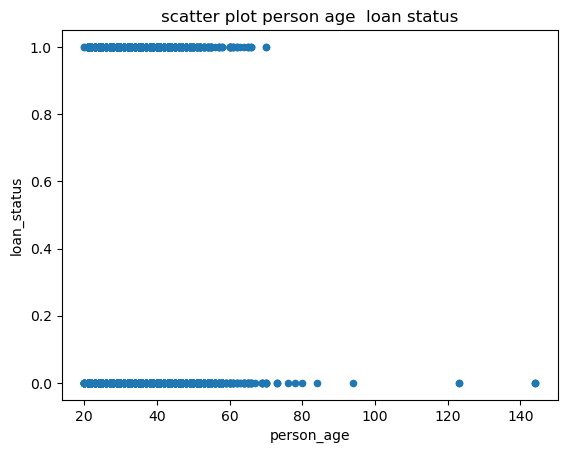

In [164]:
df.plot("person_age","loan_status",kind="scatter")
plt.title("scatter plot person age  loan status")

# Insights
- If the age is increasing then  loan status length is increasing

Text(0.5, 1.0, 'scatter plot loan status and loan int rate ')

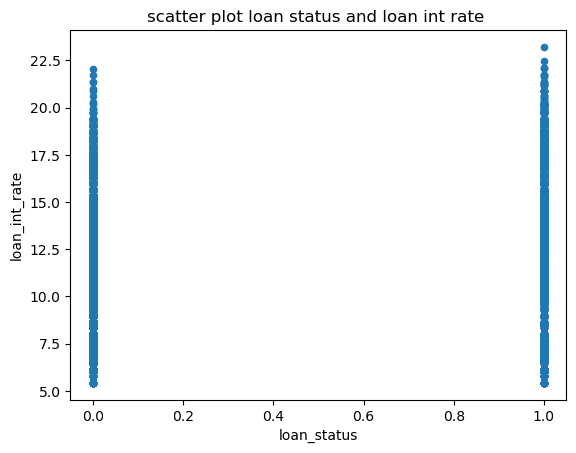

In [169]:
df.plot("loan_status","loan_int_rate",kind="scatter")
plt.title("scatter plot loan status and loan int rate ")

Text(0.5, 1.0, 'scatter plot  loan status loan_amnt')

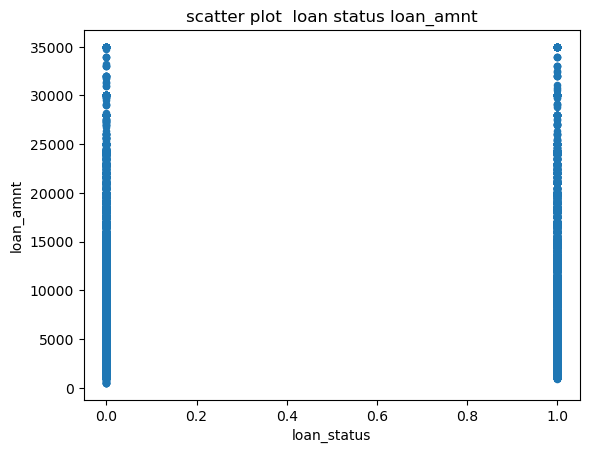

In [167]:
df.plot("loan_status","loan_amnt",kind="scatter")
plt.title("scatter plot  loan status loan_amnt")

Text(0.5, 1.0, 'scatter plot  loan percent income loan_status')

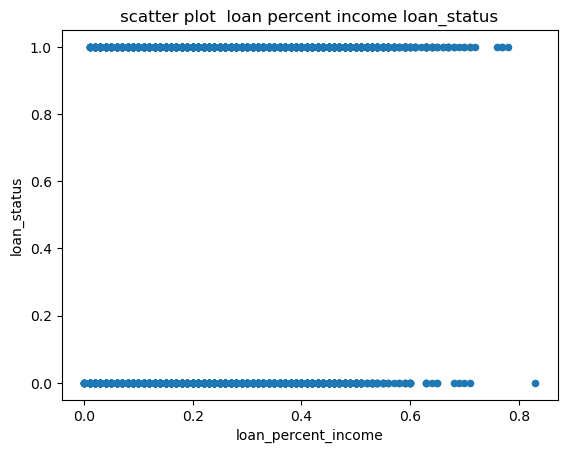

In [177]:
df.plot("loan_percent_income","loan_status",kind="scatter")
plt.title("scatter plot  loan percent income loan_status")

Text(0.5, 1.0, 'scatter plot cb_person_cred_hist_length     loan_status')

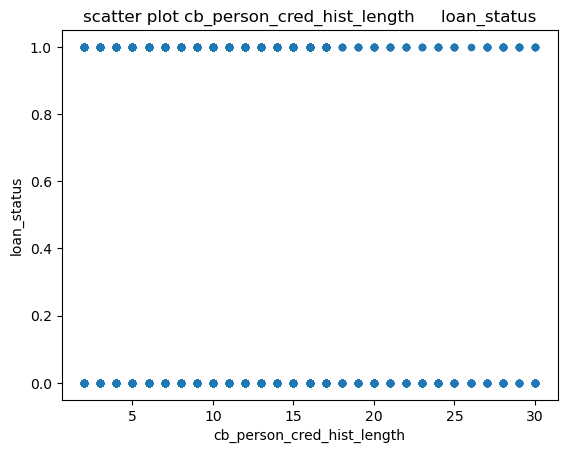

In [178]:
df.plot("cb_person_cred_hist_length","loan_status",kind="scatter")
plt.title("scatter plot cb_person_cred_hist_length     loan_status")

Text(0.5, 1.0, 'scatter plot person_income     loan_status')

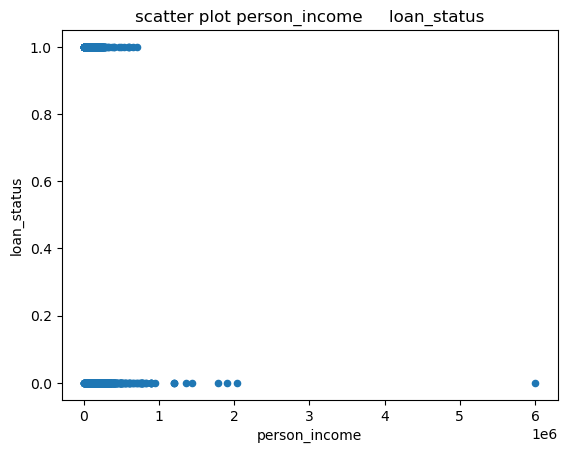

In [179]:
df.plot("person_income","loan_status",kind="scatter")
plt.title("scatter plot person_income     loan_status")

Text(0.5, 1.0, 'scatter plot person_emp_length     loan_status')

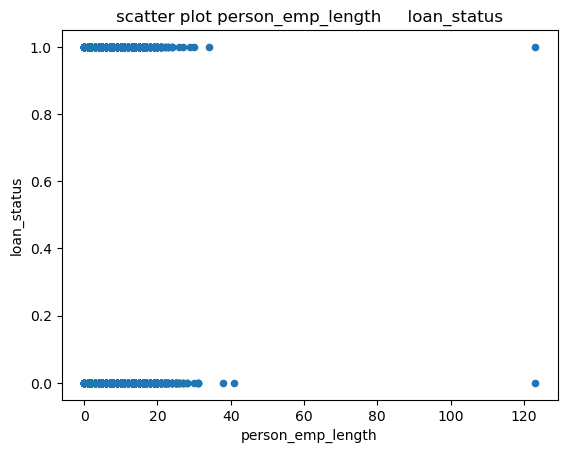

In [180]:
df.plot("person_emp_length","loan_status",kind="scatter")
plt.title("scatter plot person_emp_length     loan_status")

In [214]:
df["loan_status"].unique()

array([1, 0], dtype=int64)

# Insights
- The all numeric columns have no strong relationship between each other


## boxpplot in bivariate analysis

Text(0, 0.5, 'loan_status')

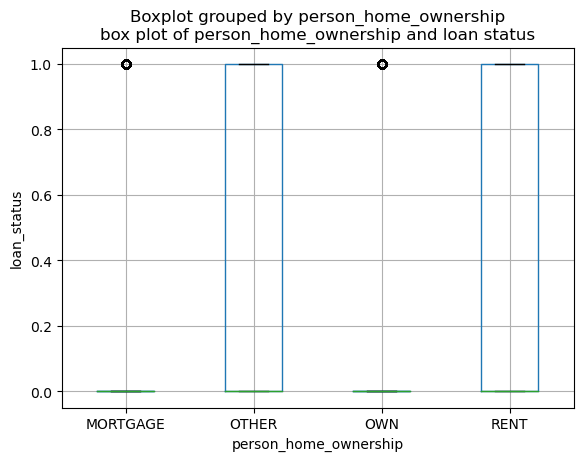

In [189]:
df.boxplot(by="person_home_ownership",column="loan_status")
plt.title("box plot of person_home_ownership and loan status")
plt.ylabel("loan_status")

# Insights
- The rent and  other loan status are approved
- The mortgage and own home ownership  have  outlier 

Text(0, 0.5, 'loan_status')

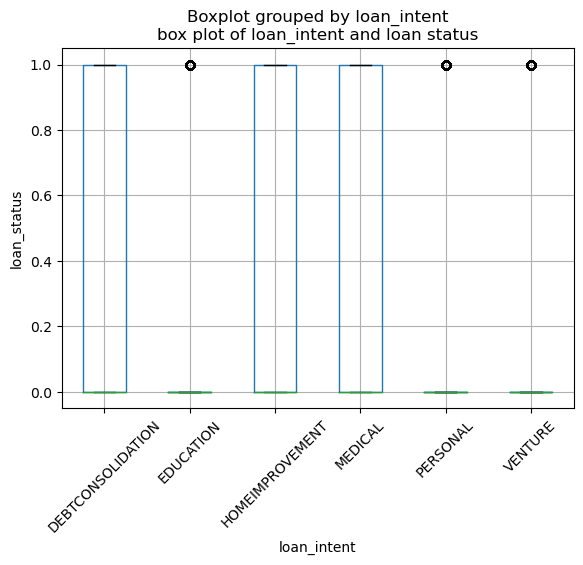

In [188]:
df.boxplot(by="loan_intent",column="loan_status")
plt.title("box plot of loan_intent and loan status")
plt.xticks(rotation=45)
plt.ylabel("loan_status")

# Insights
- The medical,homeimprovement and debtconsolidation loan status are approved
- The education ,personal and venture have outliers  

Text(0, 0.5, 'loan_status')

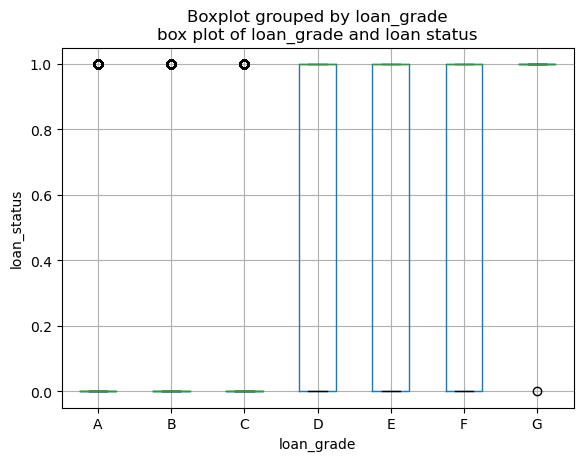

In [190]:
df.boxplot(by="loan_grade",column="loan_status")
plt.title("box plot of loan_grade and loan status")
plt.ylabel("loan_status")

# Insights
- The A,B ,C and G grades are have outliers
- The A,B,C are approved for loan status

Text(0, 0.5, 'loan_status')

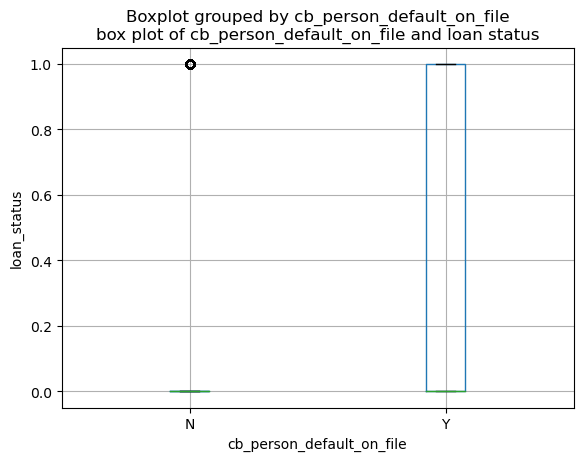

In [191]:
df.boxplot(by="cb_person_default_on_file",column="loan_status")
plt.title("box plot of cb_person_default_on_file and loan status")
plt.ylabel("loan_status")

# Insights
- The most of persons have credit history is not available loan status data
- In the N have outlier

In [64]:
clean1=df.select_dtypes(include=["int64","float64"])

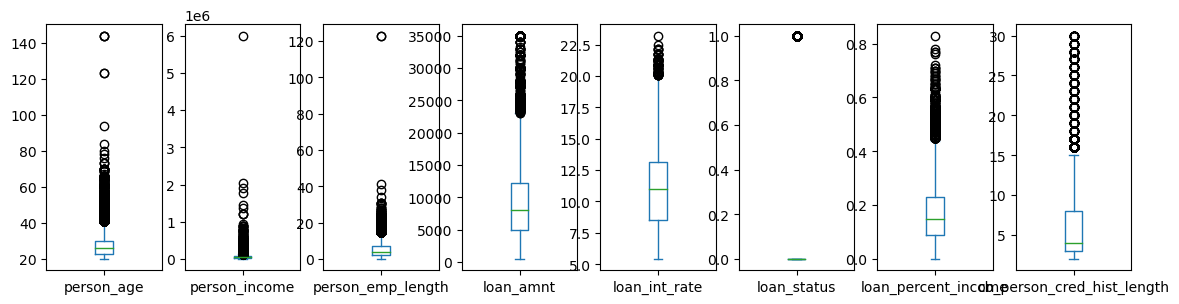

In [65]:
# boxplot for subplots of all numeric columns after removing outliers in bmi column
clean1.plot(kind="box",subplots=True,layout=(8,8),figsize=(14,30))
plt.title("box plot of all numeric data")
plt.show()

# Insights
- The data with out outliers treatment 
- In every column having outliers

In [18]:
# subplots
clean1=df.select_dtypes(include=["int64","float64"])

## after removing extreme outliers

NameError: name 'plt' is not defined

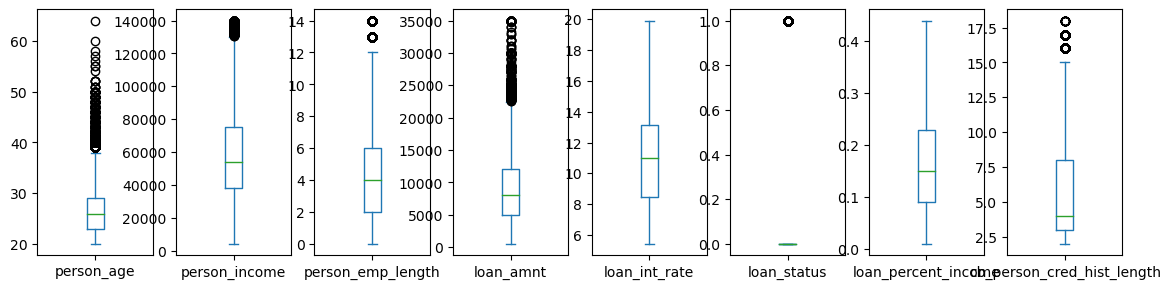

In [19]:
# boxplot for subplots of all numeric columns after removing outliers in bmi column
clean1.plot(kind="box",subplots=True,layout=(8,8),figsize=(14,30))
plt.title("box plot of all numeric data")
plt.show()

# Insights
- The data with outliers treatment 
- In every column having outliers except the person income because it few outliers and removed  

In [209]:
clean2=df.select_dtypes(include=["int64","float64"])

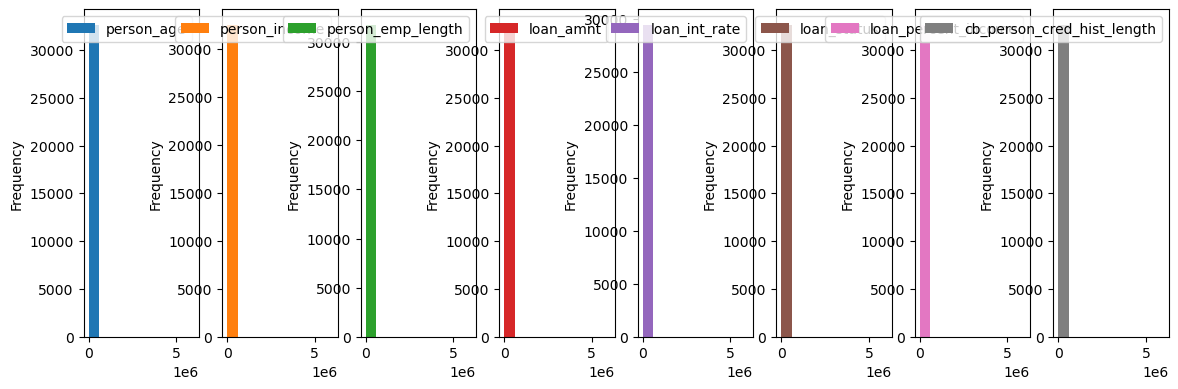

In [212]:
# boxplot for subplots of all numeric columns after removing outliers in bmi column
clean2.plot(kind="hist",subplots=True,layout=(8,8),figsize=(14,40))
plt.title("kde plot of all numeric data")
plt.show()

# conculsion :
- The all columns have outliers 
- person loan have very few outliers and treated 
- The most of the people are paying loan on time by loan grade  and few are got g grade act as           outlier
- The person age impacting the credit history length have high positive corelation 0.859 
  and loan amount impacting loan percent income the corelation 0.572612
- The loan status is depend on the loan grade
- The historical data also impacing loan status


# Recommendations :  for bankers
- If we colletion of the credit history  makes better decisions
- introduce the gold loans
- checking of pledging documents


# Recommendations : for customers
- If we colletion of the credit history  makes better decisions
- The payment on time improves the loan grade then improve the credit score/history
- The historical data makes better to get loan status by pay on time
- Improving the credit score impact the loan status

In [150]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [151]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
df.duplicated(keep="first").sum()

157

In [21]:
df.drop_duplicates(keep="first",inplace=True)

In [22]:
df.duplicated(keep="first").sum()

0

In [23]:
df.to_csv("clean_bank.csv")

In [24]:
df.shape

(29274, 12)

In [156]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29056 entries, 1 to 32566
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29056 non-null  int64  
 1   person_income               29056 non-null  int64  
 2   person_home_ownership       29056 non-null  object 
 3   person_emp_length           29056 non-null  float64
 4   loan_intent                 29056 non-null  object 
 5   loan_grade                  29056 non-null  object 
 6   loan_amnt                   29056 non-null  int64  
 7   loan_int_rate               29056 non-null  float64
 8   loan_status                 29056 non-null  int64  
 9   loan_percent_income         29056 non-null  float64
 10  cb_person_default_on_file   29056 non-null  object 
 11  cb_person_cred_hist_length  29056 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


In [117]:
# step 1
y=df["loan_status"]
X=df[['person_age', 'person_income','person_emp_length', 'loan_amnt',
      'loan_int_rate','loan_percent_income','cb_person_cred_hist_length',
      'person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']]

In [118]:
# step 2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21955, 11) (21955,)
(7319, 11) (7319,)


In [119]:
# step 3 train data preprocessing
X_train_num = X_train.select_dtypes(["int64","float64"])
X_train_cat = X_train.select_dtypes(["object"])

In [120]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
20583,MORTGAGE,EDUCATION,A,N
20704,RENT,PERSONAL,C,Y
26916,OWN,VENTURE,B,N
25926,MORTGAGE,MEDICAL,E,Y
16604,MORTGAGE,DEBTCONSOLIDATION,A,N


In [121]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20583,30,41600,2.0,4500,6.76,0.11,9
20704,28,29000,1.0,5000,15.96,0.17,7
26916,29,26000,5.0,4500,11.71,0.17,5
25926,27,68255,6.0,17500,17.93,0.22,10
16604,22,42000,4.0,3200,7.90,0.08,3


In [122]:
# before transfomed
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,21955.000000,21955.000000,21955.000000,21955.000000,21955.000000,21955.000000,21955.000000
mean,27.160601,59083.524026,4.367616,9136.704623,10.972498,0.167892,5.480301
std,5.421303,27485.796399,3.349451,5901.353813,3.042451,0.095798,3.603367
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,38400.000000,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,54050.000000,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,29.000000,75000.000000,6.000000,12000.000000,13.110000,0.230000,8.000000
max,64.000000,140004.000000,14.000000,35000.000000,19.910000,0.440000,18.000000


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),
                                  columns=X_train_num.columns,
                                  index=X_train_num.index)
X_train_num_rescale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20583,0.523760,-0.636108,-0.706883,-0.785720,-1.384606,-0.604323,0.976803
20704,0.154837,-1.094537,-1.005446,-0.700991,1.639341,0.022009,0.421754
26916,0.339299,-1.203686,0.188807,-0.785720,0.242409,0.022009,-0.133295
25926,-0.029625,0.333688,0.487370,1.417215,2.286861,0.543953,1.254328
16604,-0.951933,-0.621554,-0.109756,-1.006013,-1.009899,-0.917490,-0.688344


In [124]:
X_train_num_rescale.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.195500e+04,2.195500e+04,2.195500e+04,2.195500e+04,2.195500e+04,2.195500e+04,2.195500e+04
mean,2.635054e-16,-1.068656e-16,-5.416351e-17,1.774992e-16,1.654614e-16,1.969729e-16,1.098562e-15
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.320857e+00,-2.001207e+00,-1.304009e+00,-1.463546e+00,-1.825050e+00,-1.648211e+00,-9.658690e-01
25%,-7.674715e-01,-7.525340e-01,-7.068829e-01,-7.009915e-01,-8.159721e-01,-8.131010e-01,-6.883444e-01
50%,-2.140865e-01,-1.831360e-01,-1.097565e-01,-1.926220e-01,5.752635e-03,-1.867682e-01,-4.108198e-01
75%,3.392986e-01,5.790932e-01,4.873699e-01,4.852040e-01,7.025752e-01,6.483421e-01,6.992785e-01
max,6.795458e+00,2.944150e+00,2.875876e+00,4.382704e+00,2.937667e+00,2.840507e+00,3.474524e+00


In [125]:
# categorical data 
X_train_cat_label = X_train_cat["loan_grade"]
X_train_cat_label.head()

20583    A
20704    C
26916    B
25926    E
16604    A
Name: loan_grade, dtype: object

In [126]:
X_train_cat_label.unique()

array(['A', 'C', 'B', 'E', 'D', 'F', 'G'], dtype=object)

In [127]:
X_train_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [128]:
X_train_cat_one = X_train_cat[["person_home_ownership","loan_intent","cb_person_default_on_file"]]
X_train_cat_one.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
20583,MORTGAGE,EDUCATION,N
20704,RENT,PERSONAL,Y
26916,OWN,VENTURE,N
25926,MORTGAGE,MEDICAL,Y
16604,MORTGAGE,DEBTCONSOLIDATION,N


In [129]:
X_train_cat["person_home_ownership"].value_counts(normalize=True)

RENT        0.518880
MORTGAGE    0.400228
OWN         0.077522
OTHER       0.003371
Name: person_home_ownership, dtype: float64

In [130]:
X_train_cat["loan_intent"].value_counts(normalize=True)

EDUCATION            0.201549
MEDICAL              0.187383
VENTURE              0.173127
PERSONAL             0.167570
DEBTCONSOLIDATION    0.160692
HOMEIMPROVEMENT      0.109679
Name: loan_intent, dtype: float64

In [131]:
X_train_cat["cb_person_default_on_file"].value_counts(normalize=True)

N    0.824641
Y    0.175359
Name: cb_person_default_on_file, dtype: float64

In [132]:
X_train_cat_one_trans = pd.DataFrame(index=X_train_cat_one.index)
X_train_cat_one_trans.head()

""
20583
20704
26916
25926
16604


In [133]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
# onehot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_cat_one_trans = pd.DataFrame(encoder.fit_transform(X_train_cat_one),
                                    columns=encoder.get_feature_names_out(X_train_cat_one.columns),
                                    index=X_train_cat_one.index)
X_train_cat_one_trans.head()


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
20583,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20704,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
26916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
X_train_cat_one_trans.shape

(21955, 9)

In [136]:
encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [137]:
# label encodeing
X_train_cat_label_trans = pd.DataFrame(index=X_train_cat_label.index)
X_train_cat_label_trans.head()

""
20583
20704
26916
25926
16604


In [138]:
X_train_cat_label.unique()

array(['A', 'C', 'B', 'E', 'D', 'F', 'G'], dtype=object)

In [139]:
grade_encoder = {"G":1,"F":2,"E":3,"D":4,"C":5,"B":6,"A":7}
X_train_cat_label_trans=X_train_cat_label.apply(lambda x : grade_encoder[x])
X_train_cat_label_trans.head()

20583    7
20704    5
26916    6
25926    3
16604    7
Name: loan_grade, dtype: int64

In [140]:
# concatinate all data
X_train_transform = pd.concat([X_train_num_rescale,X_train_cat_label_trans,X_train_cat_one_trans],axis=1)
X_train_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
20583,0.523760,-0.636108,-0.706883,-0.785720,-1.384606,-0.604323,0.976803,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20704,0.154837,-1.094537,-1.005446,-0.700991,1.639341,0.022009,0.421754,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
26916,0.339299,-1.203686,0.188807,-0.785720,0.242409,0.022009,-0.133295,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25926,-0.029625,0.333688,0.487370,1.417215,2.286861,0.543953,1.254328,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16604,-0.951933,-0.621554,-0.109756,-1.006013,-1.009899,-0.917490,-0.688344,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
X_train_transform.shape

(21955, 17)

In [142]:
# test data preprocessing
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
21977,27,51000,11.0,12000,7.49,0.24,7,OWN,PERSONAL,A,N
24250,30,36000,2.0,4200,14.27,0.12,5,RENT,EDUCATION,C,Y
28511,29,63000,13.0,10000,7.49,0.16,5,RENT,MEDICAL,A,N
15445,23,69996,7.0,15000,11.89,0.21,4,RENT,EDUCATION,B,N
30703,39,75000,0.0,8000,6.54,0.11,15,RENT,VENTURE,A,N


In [143]:
X_test_num = X_test.select_dtypes(["int64","float64"])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
21977,27,51000,11.0,12000,7.49,0.24,7
24250,30,36000,2.0,4200,14.27,0.12,5
28511,29,63000,13.0,10000,7.49,0.16,5
15445,23,69996,7.0,15000,11.89,0.21,4
30703,39,75000,0.0,8000,6.54,0.11,15


In [144]:
X_test_cat = X_test.select_dtypes(["object"])

In [145]:
X_test_num_rescale = pd.DataFrame(scaler.transform(X_test_num),
                                 columns=X_test_num.columns,
                                 index=X_test_num.index)
X_test_num_rescale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
21977,-0.029625,-0.294105,1.980186,0.485204,-1.144662,0.752731,0.421754
24250,0.523760,-0.839854,-0.706883,-0.836557,1.083856,-0.499935,-0.133295
28511,0.339299,0.142494,2.577312,0.146291,-1.144662,-0.082379,-0.133295
15445,-0.767472,0.397031,0.785933,0.993574,0.301574,0.439565,-0.410820
30703,2.183915,0.579093,-1.304009,-0.192622,-1.456917,-0.604323,2.641951


In [146]:
X_test_num_rescale.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,7319.000000,7319.000000,7319.000000,7319.000000,7319.000000,7319.000000,7319.000000
mean,0.013851,-0.022708,0.013275,-0.035800,0.006098,-0.018611,0.000898
std,1.006286,0.986861,1.003584,0.976913,1.000884,0.997137,0.997372
min,-1.320857,-1.931351,-1.304009,-1.463546,-1.825050,-1.648211,-0.965869
25%,-0.767472,-0.782023,-0.706883,-0.700991,-0.815972,-0.813101,-0.688344
50%,-0.214086,-0.184955,-0.109756,-0.234986,0.005753,-0.186768,-0.410820
75%,0.523760,0.579093,0.785933,0.485204,0.712436,0.543953,0.699279
max,5.504226,2.944150,2.875876,4.382704,2.937667,2.840507,3.474524


In [147]:
X_test_num_rescale.shape

(7319, 7)

In [148]:
X_test_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [149]:
# test categorical data one hot encoder
X_test_cat_one = X_test_cat[["person_home_ownership","loan_intent","cb_person_default_on_file"]]
X_test_cat_one.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
21977,OWN,PERSONAL,N
24250,RENT,EDUCATION,Y
28511,RENT,MEDICAL,N
15445,RENT,EDUCATION,N
30703,RENT,VENTURE,N


In [150]:
X_test_cat_label =X_test_cat["loan_grade"]
X_test_cat_label.head()

21977    A
24250    C
28511    A
15445    B
30703    A
Name: loan_grade, dtype: object

In [151]:
X_test_cat["person_home_ownership"].value_counts(normalize=True)

RENT        0.523159
MORTGAGE    0.395273
OWN         0.078836
OTHER       0.002733
Name: person_home_ownership, dtype: float64

In [152]:
X_test_cat["loan_intent"].value_counts(normalize=True)

EDUCATION            0.204263
MEDICAL              0.189507
VENTURE              0.179533
PERSONAL             0.165870
DEBTCONSOLIDATION    0.156989
HOMEIMPROVEMENT      0.103839
Name: loan_intent, dtype: float64

In [153]:
X_test_cat["cb_person_default_on_file"].value_counts(normalize=True)

N    0.82443
Y    0.17557
Name: cb_person_default_on_file, dtype: float64

In [154]:
X_test_cat_one_trans = pd.DataFrame(index=X_test_cat_one.index)
X_test_cat_one_trans.head()

""
21977
24250
28511
15445
30703


In [155]:
# one encoding of nomial data
X_test_cat_one_trans =pd.DataFrame(encoder.transform(X_test_cat_one),
                              columns=encoder.get_feature_names_out(X_test_cat_one.columns),
                              index=X_test_cat_one.index)

X_test_cat_one_trans.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
21977,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
28511,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15445,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
30703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [157]:
X_test_cat_one_trans.shape

(7319, 9)

In [159]:
X_test_cat_label_trans =pd.DataFrame(index=X_test_cat_label.index)
X_test_cat_label_trans.head()

""
21977
24250
28511
15445
30703


In [160]:
# label encoding on ordinal data
grade_encoder = {"G":1,"F":2,"E":3,"D":4,"C":5,"B":6,"A":7}
X_test_cat_label_trans=X_test_cat_label.apply(lambda x : grade_encoder[x])
X_test_cat_label_trans.head()

21977    7
24250    5
28511    7
15445    6
30703    7
Name: loan_grade, dtype: int64

In [161]:
# concat of test data
X_test_transform = pd.concat([X_test_num_rescale,X_test_cat_label_trans,X_test_cat_one_trans],axis=1)
X_test_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
21977,-0.029625,-0.294105,1.980186,0.485204,-1.144662,0.752731,0.421754,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24250,0.523760,-0.839854,-0.706883,-0.836557,1.083856,-0.499935,-0.133295,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
28511,0.339299,0.142494,2.577312,0.146291,-1.144662,-0.082379,-0.133295,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15445,-0.767472,0.397031,0.785933,0.993574,0.301574,0.439565,-0.410820,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
30703,2.183915,0.579093,-1.304009,-0.192622,-1.456917,-0.604323,2.641951,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
X_test_cat_one.shape

(7319, 3)

In [162]:
X_test_transform.shape

(7319, 17)

In [186]:
# step 4 
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transform,y_train)

y_test_pred_l =reg.predict(X_test_transform)

from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(y_test,y_test_pred_l)) 
print("classification ",metrics.classification_report(y_test,y_test_pred_l))
    


accuracy_score 0.8486131985243885
classification                precision    recall  f1-score   support

           0       0.87      0.95      0.91      5765
           1       0.72      0.47      0.57      1554

    accuracy                           0.85      7319
   macro avg       0.79      0.71      0.74      7319
weighted avg       0.84      0.85      0.84      7319



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

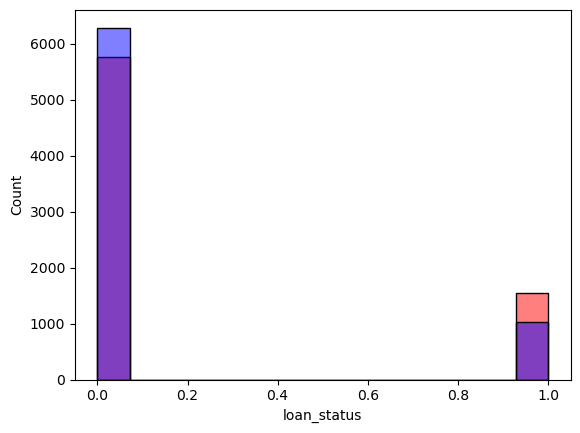

In [187]:
sns.histplot(y_test,color="red",alpha=0.5)
sns.histplot(y_test_pred_l,color="blue",alpha=0.5)



## KNN model

In [188]:
# step 4 
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_k =reg.predict(X_test_transform)

from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(y_test,y_test_pred_k))
print("classification ",metrics.classification_report(y_test,y_test_pred_k))
    


accuracy_score 0.8842738078972537
classification                precision    recall  f1-score   support

           0       0.90      0.96      0.93      5765
           1       0.80      0.61      0.69      1554

    accuracy                           0.88      7319
   macro avg       0.85      0.78      0.81      7319
weighted avg       0.88      0.88      0.88      7319



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

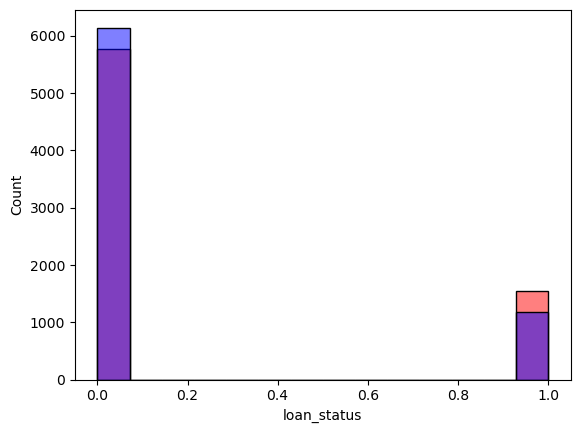

In [189]:
sns.histplot(y_test,color="red",alpha=0.5)
sns.histplot(y_test_pred_k,color="blue",alpha=0.5)



## decision tree

In [190]:
# step 4 
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_d =reg.predict(X_test_transform)

from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(y_test,y_test_pred_d))
print("classification ",metrics.classification_report(y_test,y_test_pred_d))
    


accuracy_score 0.8835906544609919
classification                precision    recall  f1-score   support

           0       0.93      0.92      0.93      5765
           1       0.72      0.74      0.73      1554

    accuracy                           0.88      7319
   macro avg       0.82      0.83      0.83      7319
weighted avg       0.88      0.88      0.88      7319



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

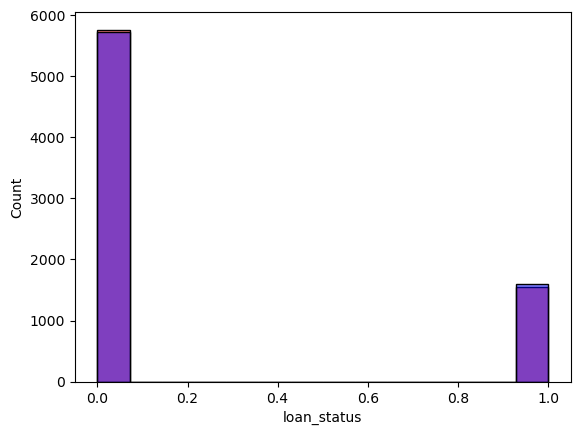

In [191]:
sns.histplot(y_test,color="red",alpha=0.5)
sns.histplot(y_test_pred_d,color="blue",alpha=0.5)



## random forest model

In [192]:
# step 4 
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_r =reg.predict(X_test_transform)

from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(y_test,y_test_pred_r))
print("classification",metrics.classification_report(y_test,y_test_pred_r))
    


accuracy_score 0.9288154119415221
classification               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5765
           1       0.96      0.70      0.81      1554

    accuracy                           0.93      7319
   macro avg       0.94      0.84      0.88      7319
weighted avg       0.93      0.93      0.92      7319



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

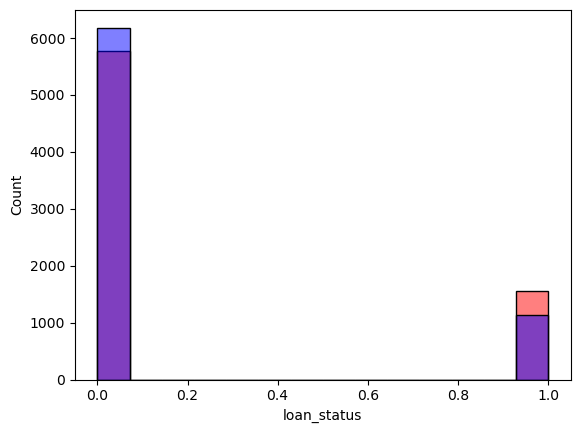

In [193]:
sns.histplot(y_test,color="red",alpha=0.5)
sns.histplot(y_test_pred_r,color="blue",alpha=0.5)



## Adaboost model

In [194]:
# step 4 
from sklearn.ensemble import AdaBoostClassifier
reg = AdaBoostClassifier()
reg.fit(X_train_transform,y_train)

y_test_pred_a =reg.predict(X_test_transform)

from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(y_test,y_test_pred_a))
print("classification_report",metrics.classification_report(y_test,y_test_pred_a))
    


accuracy_score 0.8846836999590107
classification_report               precision    recall  f1-score   support

           0       0.91      0.95      0.93      5765
           1       0.78      0.64      0.70      1554

    accuracy                           0.88      7319
   macro avg       0.84      0.79      0.81      7319
weighted avg       0.88      0.88      0.88      7319



In [173]:
import seaborn as sns

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

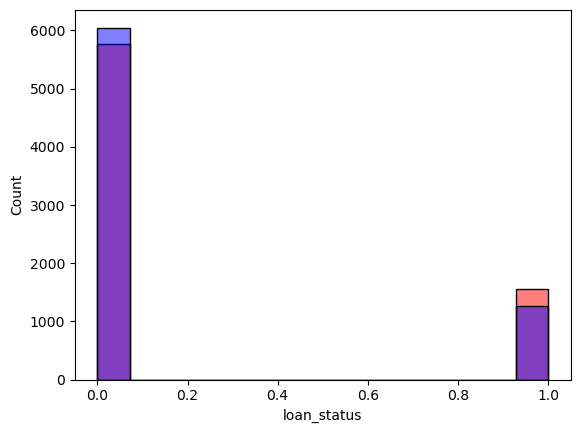

In [195]:
sns.histplot(y_test,color="red",alpha=0.5)
sns.histplot(y_test_pred_a,color="blue",alpha=0.5)

